# Dimensionality Reduction

Dimensionality reduction is a key data pre-processing technique. You will perform PCA, a popular dimensionality reduction technique to MNIST data to see how it performs.

In [7]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets import fetch_mldata                                                                       
from sklearn.utils import shuffle                                                                                                                                                                      
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC , SVR 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV                                                
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pydot, io
import time

#######################End imports###################################


Extracting MNIST\train-images-idx3-ubyte.gz
Extracting MNIST\train-labels-idx1-ubyte.gz
Extracting MNIST\t10k-images-idx3-ubyte.gz
Extracting MNIST\t10k-labels-idx1-ubyte.gz


<Figure size 432x288 with 0 Axes>

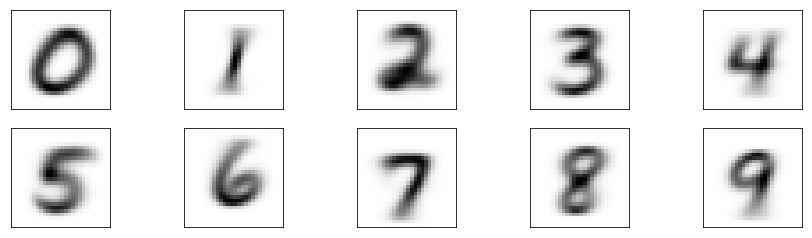

In [8]:
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data
try:
    mnist = fetch_openml("MNIST original") 

except Exception as ex: 
    import tensorflow.examples.tutorials.mnist.input_data as input_data
    m=input_data.read_data_sets("MNIST")
    data = np.concatenate((m.train.images, m.test.images))
    target = np.concatenate((m.train.labels, m.test.labels))
    class dataFrame:
        def __init__(self, data, target):
            self.data = data
            self.target = target
    mnist = dataFrame(data, target)
                                                                                                             
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        

# Recall that we previously used shuffle and assigned first 5000 data as training and remaining as testing
# Here is another way to do this
# Here we are using a function in cross validation module to split 
# By convention, let us use a 70/30 split
train_data, test_data, train_labels, test_labels = \
        train_test_split(mnist.data, mnist.target, test_size=0.3)

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
train_data = train_data / 255.0                                        
test_data = test_data / 255.0

# Plot the average value of all digits
plt.figure()
fig,axes = plt.subplots(2, 5, figsize=(15,4))

for i in range(10):
    row, col = i // 5, i%5
    
    #Subset with images for digit i only 
    digit_i_subset = train_data[train_labels == i]

    #compute avg value of digit_i_subset
    digit_i_subset_mean = np.mean(digit_i_subset, axis=0)

    axes[row][col].imshow( digit_i_subset_mean.reshape(28, 28), cmap="Greys") 
    axes[row][col].grid(False)
    axes[row][col].get_xaxis().set_ticks([])
    axes[row][col].get_yaxis().set_ticks([])

### Exercise 7: Dimensionality Reduction (25 marks)

- Task 7a: Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions and print the training time and classification accuracy on the test set. (5 marks)

- Task 7b: Perform PCA with 100 components on the training data, map both training and test data into 100-dimensional space by PCA, train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data, make predictions and print the training time and the classification accuracy on the test set. (10 marks)

- Task 7c: One way to determine how much components needs for PCA is to find the smallest value such that it explained 95% of the variance. Using the PCA results obtained above, print the cumulative variance that is explained by 100 components. (10 marks)

In [3]:
# Task t7a (5 marks)
# Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions
# Print the training time and classification accuracy on the test set
# Write your code here

start = time.time()
multiclf = OneVsRestClassifier(LinearSVC(random_state=1234), n_jobs=-1)
multiclf.fit(train_data, train_labels)
end = time.time()
print("Time taken for training: {0:.1f} seconds".format(end - start))
multipred = multiclf.predict(test_data)
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(multipred, test_labels)))

Time taken for training: 10.7 seconds
Training accuracy: 0.8357


In [4]:
# Task t7b (10 marks)
# Perform PCA on the training data and map both training and test data into 100-dimensional space by PCA, 

pca = PCA(n_components=100, svd_solver='arpack')
pca.fit(train_data)
trans_train_data = pca.transform(train_data)
trans_test_data = pca.transform(test_data)

# Train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data,
# Print the training time and classification accuracy on the test set
# Remember that MNIST images are 28x28 => 784 features.

# You might want to check http://scikit-learn.org/stable/modules/decomposition.html
#decompositions for details
# Write your code below

start = time.time()
PCA_svcclf = OneVsRestClassifier(LinearSVC(random_state=1234), n_jobs=-1)
PCA_svcclf.fit(trans_train_data, train_labels)
end = time.time()
print("Time taken for training: {0:.1f} seconds".format(end - start))
PCA_svcpred = PCA_svcclf.predict(trans_test_data)
print("Training accuracy: {0:.4f}".format(metrics.accuracy_score(PCA_svcpred, test_labels)))


Time taken for training: 3.3 seconds
Training accuracy: 0.8349


#### Comments

Undertaking dimensionality reduction via PCA into 100-dimensional space from the original 784 has reduced the amount of time needed to train the data while training accuracy is kept mostly the same.

In [5]:
# Task t7c (10 marks)

# One way to determine how much components needs for PCA is to find the smallest value 
# such that it explained 95% of the variance. 
# Using the PCA results obtained above, print the cumulative variance that is explained 
# by 100 components.
# Write your code below

##### testing how many components needed so that it would explain 95% of the variance - 153
pcatest = PCA(0.95)
pcatest.fit(train_data)
t_train = pcatest.transform(train_data)
t_test = pcatest.transform(test_data)
t = pcatest.explained_variance_ratio_
t.shape

(153,)

In [6]:
var_data = pca.explained_variance_ratio_

total_variance = sum(var_data)
print("{0:.2f}% of the variance in the data is explained by 100 components"
      .format(total_variance * 100))

91.51% of the variance in the data is explained by 100 components


#### Comments

With 100 components, we can explain 91.51% of the variance in the data which is a bit short of the 153 needed to account for 95% of the variance.